<a href="https://colab.research.google.com/github/dla9944/apatheia/blob/main/221208_chapter2_pandas2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임에서의 데이터 조작(처리)
= 통계, 정돈, 정리와 같다

* pandas는 Numpy 2차원 배열에서 가능한 대부분의 데이터 처리
  + pandas 만의 데이터 처리 및 변환 관련 함수/기능들을 제공

##데이터 갯수 세기

### 시리즈 갯수 세기 s.count() 
: series.count( ) : 결측치(nan)을 빼고 세줍니다.

In [ ]:
s = pd.Series(range(10))

In [ ]:
s[3] = np.nan # nan : 결측치. 측정을 했는데 결여된 값
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [ ]:
s.count()

9

In [ ]:
s2 = pd.Series(range(10))
s2.count()

10

### 데이터프레임의 갯수 세기 df.count(axis=0)

* NaN이 float 타입
* dtype = 직접 타입을 넣어주어서 지정합니다 ('i', 'f'...)

In [ ]:
np.random.seed(8)
df = pd.DataFrame(np.random.randint(5, size=(4,4), dtype=int))
# dtype 이 int인 4 x 4 의 배열로 데이터프레임을 제작합니다
# dtype = 직접 타입을 넣어줘서 지정합니다.
df

,0,1,2,3
0,3,4,1,1
1,2,0,3,0
2,0,4,1,3
3,2,3,4,1


In [ ]:
df[3][2] # 기본 인덱싱

3

In [ ]:
df.loc[2,3] # loc

3

In [ ]:
df.iloc[2,3] # iloc - 순서에 기반한 정수 인덱스로 부여 (iloc, loc 결과 같음)

3

In [ ]:
df.iloc[2,3] = np.nan # 갱신, 대입
df

,0,1,2,3
0,3,4,1,1.0
1,2,0,3,0.0
2,0,4,1,NaN
3,2,3,4,1.0


In [ ]:
df.count() 

0    4
1    4
2    4
3    3
dtype: int64

In [ ]:
df.columns = ['A','B','C','D']
df

,A,B,C,D
0,3,4,1,1.0
1,2,0,3,0.0
2,0,4,1,NaN
3,2,3,4,1.0


In [ ]:
df.count() # 열 이름대로

A    4
B    4
C    4
D    3
dtype: int64

In [ ]:
df.count(axis=1) # 행 방향으로 count

0    4
1    4
2    3
3    4
dtype: int64

### seaborn <파이썬 패키지>

* 분석할 때 사용하는 데이터 시각화 관련 패키지
🛬 데이터세트 내장

In [ ]:
import seaborn as sns # 데이터 시각화 패키지

In [ ]:
titanic = sns.load_dataset('titanic') # pd.read_csv... url...
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.head() # 상위 5개

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.tail() # 하위 5개

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe() # 통계값 --> 계산가능한 숫자들로 구성된 값들에 대한 통계값
# --> 연속형 변수

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.describe(include='O') # 범주형 변수에 대한 통계값

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
titanic.describe(include='all') # 범주형 변수에 대한 통계값

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🐈 연습 문제1
* 타이타닉 승객 데이터의 데이터 개수를 각 열마다 구해보시오.

In [ ]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [ ]:
titanic.count(0)

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### 범주(카테고리) 값 세기
* 시리즈의 값이 정수, 문자열, 카테고리 값인 경우에는 `value_counts` 메소드로 각각의 값이 나온 횟수를 셀 수 있습니다.

In [ ]:
np.random.seed(8)
s2 = pd.Series(np.random.randint(6, size=100))
s2

0     3
1     4
2     1
3     1
4     5
     ..
95    4
96    0
97    1
98    3
99    2
Length: 100, dtype: int64

In [ ]:
s2.value_counts() # (1) 중복되지 않는 값들만 추려내서 (2) 각 값들의 갯수를 카운팅

3    20
2    19
1    16
5    16
4    15
0    14
dtype: int64

In [ ]:
df['A'].value_counts() # df[열이름].value_counts : 고유한 값들 > 카운트합니다

2    2
3    1
0    1
Name: A, dtype: int64

In [ ]:
# 고유값 배열 set
s2.unique() # 고유값 배열을 리턴

array([3, 4, 1, 5, 2, 0])

In [ ]:
s2.nunique() # 고유값의 갯수를 리턴

6

## 데이터 정렬 (sort)
데이터를 정렬하려면 `sort_index` 또는 `sort_values`를 사용

* `sort_index` : 인덱스 값을 기준으로 정렬 (정수냐 라벨이냐 문자열이냐)
* `sort_values` : 데이터 값 기준으로 정렬.

> 오름차순 → 행이 늘어나는 방향 → 데이터가 커지는 방향을 일치시켜 주겠다
>> ascending


> 내림차순 → 데이터가 나열되는 방향 → 데이터가 커지는 방향을 반대로 하겠다.
>>descending

In [ ]:
s2.value_counts() # 인덱스가 지멋대로, 값기준으로 내림차순

3    20
2    19
1    16
5    16
4    15
0    14
dtype: int64

In [ ]:
s2.value_counts().sort_index() # 오름차순. 인덱스

0    14
1    16
2    19
3    20
4    15
5    16
dtype: int64

In [ ]:
#오름차순
s2.value_counts().sort_index(ascending = True)

0    14
1    16
2    19
3    20
4    15
5    16
dtype: int64

In [ ]:
#내림차순
s2.value_counts().sort_index(ascending = False)

5    16
4    15
3    20
2    19
1    16
0    14
dtype: int64

In [ ]:
s.sort_values() # NaN 가장 밑으로 내려감 (na_position=last)
s.sort_values(na_position='first') # NaN이 가장 위로 올라감

3    NaN
0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [ ]:
df

,0,1,2,3
0,3,4,1,1
1,2,0,3,0
2,0,4,1,3
3,2,3,4,1


### 열의 라벨을 by로 지정

In [ ]:
# 데이터 프레임의 경우에는 sort_values 하고 싶으면 기준이 되는 열의 라벨(이름)을 by로 지정해야 합니다.
#df.sort_values()
# 정렬을 하고 싶으면 기준이 되는 열의 위치를 주세요.
df.sort_values(by="A")

KeyError: ignored

In [ ]:
df.sort_values(by=["C","A"])

## 행/열 합계
* Numpy 에서는 np.sum 이었습니다

In [ ]:
np.random.seed(12)
df2 = pd.DataFrame(np.random.randint(10, size=(4,8)))
df2

,0,1,2,3,4,5,6,7
0,6,1,2,3,3,0,6,1
1,4,5,9,2,6,0,5,8
2,2,9,3,4,3,1,7,0
3,2,6,2,0,4,6,9,0


### 행 방향 합계 (열 방향 axis = 0/ 행 방향 axis =1)


In [ ]:
# 행 방향 합계 
df2.sum() # 열단위 (axis = 0)
df2.sum(axis = 1) # 행 방향 합계

0    22
1    39
2    29
3    29
dtype: int64

In [ ]:
df2.sum(axis =1)

0    22
1    39
2    29
3    29
dtype: int64

In [ ]:
df2['Sum'] =df2.sum(axis=1)
df2['Sum']

0    22
1    39
2    29
3    29
Name: Sum, dtype: int64

In [ ]:
df2.loc['ColSum',:] = df2.sum() # 열 합계
df2

,0,1,2,3,4,5,6,7,Sum
0,6.0,1.0,2.0,3.0,3.0,0.0,6.0,1.0,44.0
1,4.0,5.0,9.0,2.0,6.0,0.0,5.0,8.0,78.0
2,2.0,9.0,3.0,4.0,3.0,1.0,7.0,0.0,58.0
3,2.0,6.0,2.0,0.0,4.0,6.0,9.0,0.0,58.0
ColSum,14.0,21.0,16.0,9.0,16.0,7.0,27.0,9.0,238.0


In [ ]:
# sum : 합계 / mean : 평균
df2.mean() # 열 방향 평균
df2.mean(axis = 1)

0    4.888889
1    8.666667
2    6.444444
3    6.444444
dtype: float64

## 🎉 연습문제2

1. 타이타닉 호 승객의 평균 나이를 구하라
2. 타이타닉 호 승객중 여성 승객의 평균 나이를 구하라.
3. 타이타닉 호 승객 중 1등실 선실의 여성 승객의 평균 나이를 구하라.

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 문제풀이

In [ ]:
#1
titanic.age.mean()

29.69911764705882

In [ ]:
titanic.loc[titanic.sex =='female'].age.mean()

27.915708812260537

In [ ]:
f = titanic['sex'] =='female' # 불리언 배열 인덱싱으로 여성만 필터링

In [ ]:
titanic.loc[f].age.mean()

27.915708812260537

In [ ]:
d = titanic.loc[titanic.sex =='female']
d

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# 3. 타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.
# [타이타닉호] (df)
# [1등실 선실] (condition)
# [여성 승객] (condition)
# [평균] (계산)
# [나이] (column)
titanic.pclass.unique() # 1->1등급

array([3, 1, 2])

In [ ]:
first_class = titanic.pclass== 1
first_class

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: pclass, Length: 891, dtype: bool

In [ ]:
df_t = titanic[first_class & f] # and(&) => 둘 다 True 만족시키는 원소만 True
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,adult
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,child
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False,adult
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True,adult
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,adult
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,adult


In [ ]:
df_t.pclass.unique(), df_t.sex.unique()

(array([1]), array(['female'], dtype=object))

In [ ]:
df_t.age.mean()

34.61176470588235

## `apply` 변환

* sum, mean 이미 정의된 함수/ 메소드. 어떠한 작업을 해줄지 이미 정해져 있습니다.
* 행이나 열 단위로 복잡한 데이터 처리 >> `apply`메소드 사용
* 인수로 행 또는 열을 받는 함수를 기준으로 `apply` 메소드의 인수로 넣으면 각 열(또는 행)을 반복하여 그 함수에 적용시킵니다

In [ ]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# 각 열의 최댓값과 최소값을 차이를 구하는 연산
df3.max()-df3.min()

A    3
B    2
C    4
dtype: int64

In [ ]:
df3.columns # axis=0 (열)

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
df3.index # axis=1 (행)

RangeIndex(start=0, stop=5, step=1)

### 람다 함수
lambda x: (x) : lambda의 인자들 : 인자를 사용해서 나올 표현식 (반환될 내용)

익명함수는 def fun_name : lambda 이름을 줄 필요 x --> 사용되고 휘발됨

df3.apply(lambda x: x.max())- x.min()

 * x가 무엇이냐면 열을 의미

In [ ]:
df2

,0,1,2,3,4,5,6,7,Sum
0,6.0,1.0,2.0,3.0,3.0,0.0,6.0,1.0,44.0
1,4.0,5.0,9.0,2.0,6.0,0.0,5.0,8.0,78.0
2,2.0,9.0,3.0,4.0,3.0,1.0,7.0,0.0,58.0
3,2.0,6.0,2.0,0.0,4.0,6.0,9.0,0.0,58.0
ColSum,14.0,21.0,16.0,9.0,16.0,7.0,27.0,9.0,238.0


In [ ]:
df2.apply(lambda x: x.max() - x.min()) # 각 열의 최댓값 - 최솟값


0       12.0
1       20.0
2       14.0
3        9.0
4       13.0
5        7.0
6       22.0
7        9.0
Sum    194.0
dtype: float64

In [ ]:
df2.apply(lambda x: x.max() - x.min(), axis=1) # 각 행의 최댓값 - 최솟값

0          44.0
1          78.0
2          58.0
3          58.0
ColSum    231.0
dtype: float64

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


In [ ]:
titanic.sex.apply(lambda x: 'M' if x =='male' else 'F') # 어떤 행이 남성이면 M을 배출하고, 여성이라면 F를 배출하시오.

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: sex, Length: 891, dtype: object

### 설명
* age : 칼럼 --> 시리즈 --> 행들이 x
* 삼항연산자 : (조건을 만족시켰을 때의 값) if (검증할 조건) else (조건을 만족시키지 않았을 때 값)
* 다른 언어 : (조건)? 참일 때 : 거짓일 때


In [ ]:
titanic.sex.apply(lambda x: 'M' if x =='male' else 'F')

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: sex, Length: 891, dtype: object

In [ ]:
# [행 기준으로 apply]
#f"{sex} / {embark_town}"
# x -> 행 그 자체
titanic.apply(lambda x : f"{x.sex} . {x.embark_town}", axis=1)

0        male . Southampton
1        female . Cherbourg
2      female . Southampton
3      female . Southampton
4        male . Southampton
               ...         
886      male . Southampton
887    female . Southampton
888    female . Southampton
889        male . Cherbourg
890       male . Queenstown
Length: 891, dtype: object

In [ ]:
def some_fun(X):
  return len(X) **2

In [ ]:
titanic.apply(some_fun)

survived       793881
pclass         793881
sex            793881
age            793881
sibsp          793881
parch          793881
fare           793881
embarked       793881
class          793881
who            793881
adult_male     793881
deck           793881
embark_town    793881
alive          793881
alone          793881
dtype: int64

In [ ]:
titanic.apply(len) # 함수를 () 소괄호를 생략하고 넣으면, lambda 처럼 써줄 수 있음

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       891
class          891
who            891
adult_male     891
deck           891
embark_town    891
alive          891
alone          891
dtype: int64

In [ ]:
# apply로 계산한 값을 특정 키(열 이름)에 추가
titanic['adult/child'] = titanic.apply(
    lambda r:"adult" if r.age >= 20 else "child",
    axis = 1 # row(행) 기준 처리

)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


## 😭  연습문제 3
> 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만들어라. category1 카테고리는 다음과 같이 정의된다.
1. 20살이 넘으면 성별을 그대로 사용한다.
1. 20살 미만이면 성별에 관계없이 “child”라고 한다.

In [ ]:
titanic
#1. 20살이 넘으면 (df.age >= 20) = df.sex
#2. 20살 미만이면 (df.age < 20) = child

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


In [ ]:
titanic['category1'] = (
    titanic.apply(lambda r : r.sex if r.age >= 20 else 'child', axis =1)
  )
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male


In [ ]:
titanic.category1.unique()

array(['male', 'female', 'child'], dtype=object)

In [ ]:
titanic.category1.value_counts() # 남성, 아이, 여성의 합계

male      364
child     341
female    186
Name: category1, dtype: int64

# 간단한 메서드 들

## `fillna`

* NaN 값을 특정한 데이터로 채워주는 메소드

In [ ]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
df3.apply(pd.value_counts) # 열마다 어떠한 고유값이 쓰였는지 빈도
# pd.value_counts(열) -> 특정한 열에 고유값이 어떤 빈도로 쓰였는지 확인
# apply(axis=0) : 열 기준으로 데이터를 판단

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [ ]:
df3.apply(pd.value_counts).fillna(0.0) # 0.0 으로 nan으로 채웁니다
# fill : 채운다

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## `astype` 메서드
* 지정한 시리즈, 데이터프레임의 자료형을 변경

In [ ]:
df4 = df3.apply(pd.value_counts).fillna(0.0)
df4

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [ ]:
df4.A.dtype

dtype('float64')

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       5 non-null      float64
dtypes: float64(3)
memory usage: 160.0 bytes


### 사용
* astype(바꾸고 싶은 타입)
* 원본에는 영향을 주지 않습니다.

In [ ]:
df4.astype(int) 

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


In [ ]:
df4.A

1    1.0
2    0.0
3    2.0
4    2.0
5    0.0
Name: A, dtype: float64

## 실수 값을 범주형 값으로 변환
* 연령 범위는 0~99세 를 어린이, 청소년, 청년, 중년, 노년까지 나눌 수 있습니다.
* 소득 은 숫자를 빈민, 서민, 중산, 부유, 초부유층으로 나눌 수 있습니다.

##`cut` 과 `qcut`

* 실수 값을 크기 기준으로 하여 카테고리 값으로 변환하고 싶을 때 사용합니다.

In [ ]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

### 가정
* 1세 ~ : 미성년자
* 20세 ~ : 청년
* 30세 ~ : 중년
* 50세 ~ : 장년
* 70세 ~ : 노년

In [ ]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년","중년","장년","노년"]
cats = pd.cut(ages, bins, labels)

In [ ]:
cats # 0세와 101세는 nan값 도출

[NaN, (1.0, 20.0], (1.0, 20.0], (20.0, 30.0], (20.0, 30.0], ..., (50.0, 70.0], (1.0, 20.0], (30.0, 50.0], (30.0, 50.0], NaN]
Length: 12
Categories (5, interval[int64, right]): [(1, 20] < (20, 30] < (30, 50] < (50, 70] < (70, 100]]

In [ ]:
bins2 = [0,1,20,30,50,70,100,200]
labels2 = ['아기','미성년자','청년','중년','장년','노년','초고령']
cats2 = pd.cut(ages, bins2, labels=labels2)
cats2

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '중년', '초고령']
Length: 12
Categories (7, object): ['아기' < '미성년자' < '청년' < '중년' < '장년' < '노년' < '초고령']

In [ ]:
df_age = pd.DataFrame({'age': ages})
df_age

,age
0,0
1,2
2,10
3,21
4,23
5,37
6,31
7,61
8,20
9,41


In [ ]:
df_age['age_cat'] = cats
df_age

,age,age_cat
0,0,NaN
1,2,"(1.0, 20.0]"
2,10,"(1.0, 20.0]"
3,21,"(20.0, 30.0]"
4,23,"(20.0, 30.0]"
5,37,"(30.0, 50.0]"
6,31,"(30.0, 50.0]"
7,61,"(50.0, 70.0]"
8,20,"(1.0, 20.0]"
9,41,"(30.0, 50.0]"


In [ ]:
df_age['age_cat'] = cats
df_age

,age,age_cat
0,0,NaN
1,2,"(1.0, 20.0]"
2,10,"(1.0, 20.0]"
3,21,"(20.0, 30.0]"
4,23,"(20.0, 30.0]"
5,37,"(30.0, 50.0]"
6,31,"(30.0, 50.0]"
7,61,"(50.0, 70.0]"
8,20,"(1.0, 20.0]"
9,41,"(30.0, 50.0]"


In [ ]:
#qcut : 특정한 범위를 쪼개서 처리
qcats = pd.qcut(ages, 4, labels=['유년','청년','장년','노년'])
qcats

['유년', '유년', '유년', '청년', '청년', ..., '노년', '청년', '노년', '장년', '노년']
Length: 12
Categories (4, object): ['유년' < '청년' < '장년' < '노년']

In [ ]:
df_age['age_cat2'] = qcats
df_age

,age,age_cat2
0,0,유년
1,2,유년
2,10,유년
3,21,청년
4,23,청년
5,37,장년
6,31,장년
7,61,노년
8,20,청년
9,41,노년


## 데이터 프레임에서의 인덱스 조작

2개를 소개합니다

### `set_index` : 새로운 행 인덱스 지정
: 특정한 열을 새로운 행 인덱스로 지정 (기존 행의 인덱스를 제거)



### `reset_index` : 새로운 열 추가
: 기존의 행 인덱스를 제거하고, 해당 인덱스를 새로운 열로 추가


In [ ]:
import numpy as np

In [ ]:
arr = np.vstack([
    ["A","B","C","D","E"],
    np.round(np.random.rand(3,5),2)
])
arr

array([['A', 'B', 'C', 'D', 'E'],
       ['0.31', '0.67', '0.47', '0.82', '0.29'],
       ['0.73', '0.7', '0.33', '0.33', '0.98'],
       ['0.62', '0.95', '0.77', '0.83', '0.41']], dtype='<U32')

In [ ]:
arr.shape

(4, 5)

In [ ]:
arr.T

array([['A', '0.31', '0.73', '0.62'],
       ['B', '0.67', '0.7', '0.95'],
       ['C', '0.47', '0.33', '0.77'],
       ['D', '0.82', '0.33', '0.83'],
       ['E', '0.29', '0.98', '0.41']], dtype='<U32')

In [ ]:
np.random.seed(22)

In [ ]:
df1 = pd.DataFrame(
    np.vstack([                  # 같은 열 사이즈인데 행 방향으로 겹쳐집니다
      ["A", "B", "C", "D", "E"], # list('ABCDE') 1 x 5 모양
        # 0 ~ 1 실수를 3x5 행렬 모양으로.
        np.round(np.random.rand(3, 5), 2)
    ]).T,
    columns=["C1", "C2", "C3", "C4"] # 열 인덱스
)
df1

,C1,C2,C3,C4
0,A,0.21,0.34,0.01
1,B,0.48,0.27,0.56
2,C,0.42,0.69,0.81
3,D,0.86,0.22,0.75
4,E,0.17,0.81,0.19


In [ ]:
df1.info() # c2, c3, c4를 float로 바꾸려면 astype(float)로 바꾸고 대입합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C1      5 non-null      object
 1   C2      5 non-null      object
 2   C3      5 non-null      object
 3   C4      5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [ ]:
# set_index 사용해서 c1열을 인덱스로 지정해서 사용하겠습니다
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.01,0.77,0.58
B,0.77,0.69,0.7
C,0.96,0.39,0.11
D,0.7,0.62,0.92
E,0.3,0.43,0.99


In [ ]:
df3 = df2.set_index('C2')
df3

,C3,C4
C2,,
0.01,0.77,0.58
0.77,0.69,0.7
0.96,0.39,0.11
0.7,0.62,0.92
0.3,0.43,0.99


### 원래 있던 행 인덱스를 추가적인 열로 이동

In [ ]:
df2.reset_index()

,C1,C2,C3,C4
0,A,0.01,0.77,0.58
1,B,0.77,0.69,0.7
2,C,0.96,0.39,0.11
3,D,0.7,0.62,0.92
4,E,0.3,0.43,0.99


### 원래 있던 행 인덱스를 삭제
* 0부터 시작하는 정수형 인덱스로 만들기

In [ ]:
df2.reset_index(drop=True)

,C2,C3,C4
0,0.01,0.77,0.58
1,0.77,0.69,0.7
2,0.96,0.39,0.11
3,0.7,0.62,0.92
4,0.3,0.43,0.99


## 데이터프레임의 합성

* numpy 배열을 합치는 것 
    * `concatenate`, `vstack`(열 사이즈), `hstack`(행),
    * `dstack`(m x n), `stack`(모양을 내가 설정해서)...

<br>  즉, 모양이 맞는 것들을 연결합니다.

#### 합성의 대상

1. 공통 열 (1:1 연결)

|이름|전화번호|
|-|-|
|김제육|010-2222-3333|
|이김치|010-5555-8888|

|이름|주소|
|-|-|
|김제육|서울시 제육구|
|이김치|경기도 김치시|

↓

|이름|주소|전화번호|
|-|-|-|
|김제육|서울시 제육구|010-2222-3333|
|이김치|경기도 김치시|010-5555-8888|

* 이름 : 공통 열
행 라벨 : 열, 이름, 행 인덱스
-------------------------------

2. value 기준으로 1:다 매칭

|이름|주소|
|-|-|
|A맨|서울시|
|B맨|경기도|
|C맨|서울시|

|주소|지원금|
|-|-|
|서울시|10000|
|경기도|11000|


↓

|이름|주소|지원금|
|-|-|-|
|A맨|서울시|10000|
|B맨|경기도|11000|
|C맨|서울시|10000|


### 연결용 데이터프레임

In [ ]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


### 결합 merge

merge : 결합하다

* inner join으로 합체
: 기준이 되는 열이 양쪽 데이터프레임에 모두 속하는 원소들만 남겨줌

#### 구조

* pd.merge(df1, df2)

In [ ]:
pd.merge(df1,df2) #df1에도 데이터가 있고, df2에도 데이터가 있는 고객번호를 기준으로 결합

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


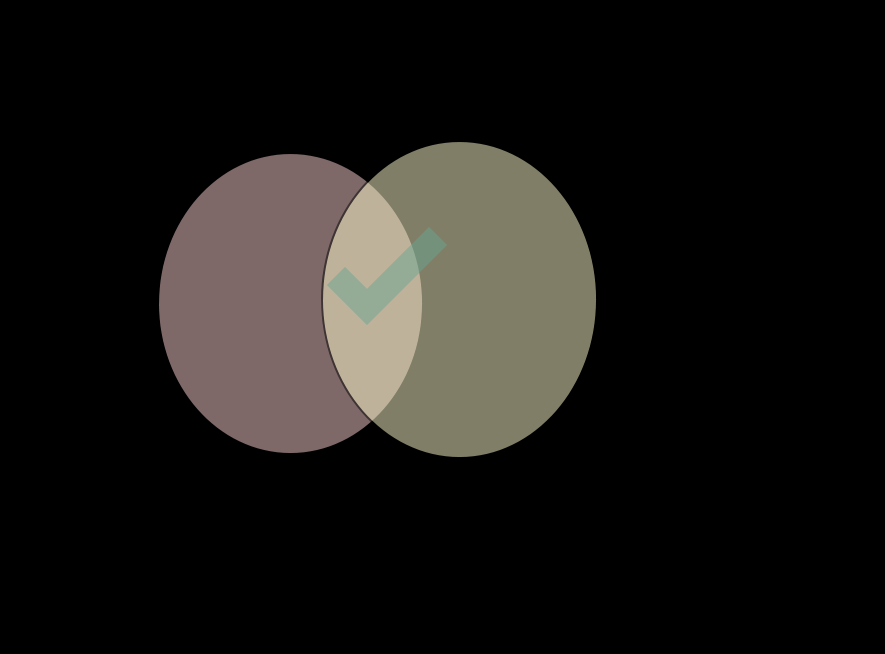

In [ ]:
pd.merge(df1,df2,how ="inner")

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


* outer join으로 합체
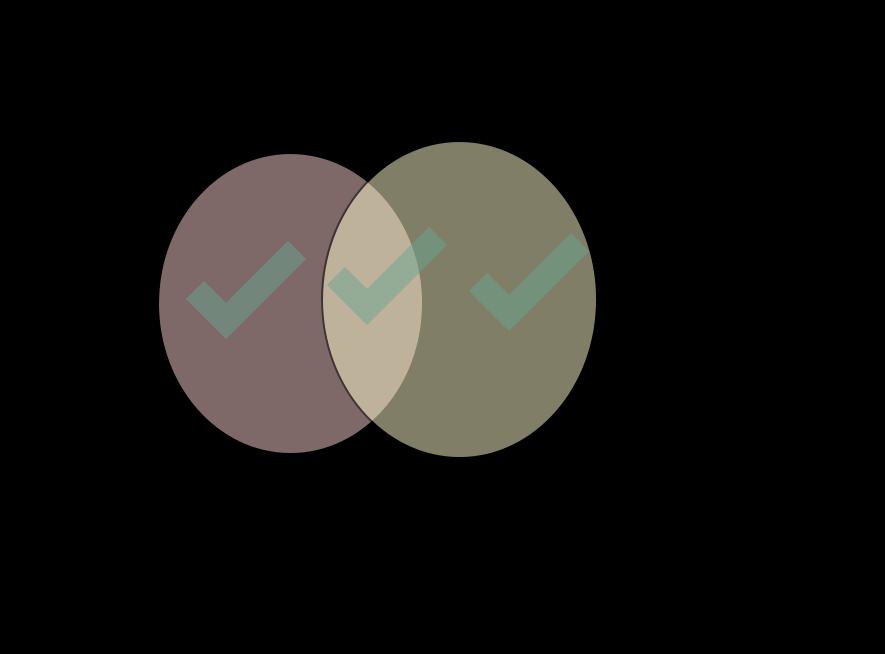

In [ ]:
pd.merge(df1,df2,how ="outer")

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
pd.merge(df1,df2, how = 'left') # left : df1 왼쪽에 있습니다

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [ ]:
pd.merge(df1,df2, how = 'right') # right : df2 오른쪽에 있습니다 (df2의고객번호를 기준으로 이름 행 강제 합체)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [ ]:
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000
